In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv")
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
df=df.drop(["Unnamed: 0"],axis=1)

In [4]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

# Checking null values

In [5]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

no null values are present

In [6]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [7]:
df["sales"].unique()

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. ,  5.6,
       15.5, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,  9.5, 12.8,
       25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7,  8.5, 14.9, 23.2, 14.8,
       11.4, 10.7, 22.6, 21.2, 20.2, 23.7,  5.5, 23.8, 18.4,  8.1, 24.2,
       15.7, 14. , 13.4, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 12.3, 13.6, 21.7, 15.2, 16. , 16.7, 11.2,  7.3, 19.4,
       22.2, 11.5, 16.9, 11.7, 17.2, 19.2, 19.8, 21.8, 14.1, 12.6, 12.2,
        9.4,  6.6,  7. , 11.6, 19.7, 24.7,  1.6, 12.7,  5.7, 19.6, 10.8,
       20.8, 10.9, 20.1, 10.3, 16.1, 15.6,  3.2, 15.3, 14.4, 13.3,  8. ,
        8.4, 14.5,  7.6, 27. , 26.2, 17.6, 17.3,  6.7,  9.9,  5.9, 25.5])

In [8]:
df.loc[df['sales']==" "]

,TV,radio,newspaper,sales


There is no spaces is there

# Visualization of data

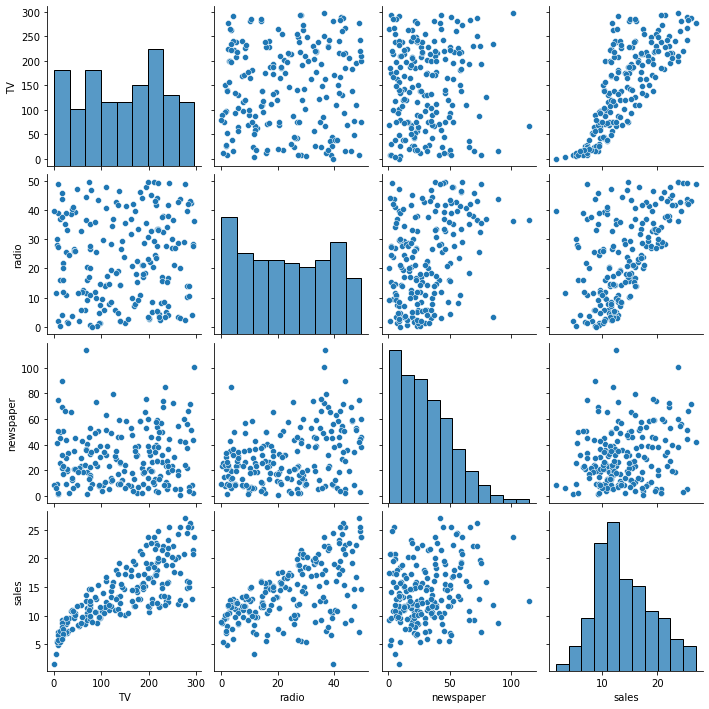

In [9]:
sns.pairplot(df)

# Checking the distribution of the continous value of the float type columns:

In [10]:
df_visualization_continous=df[["sales",'TV','newspaper','radio']].copy()

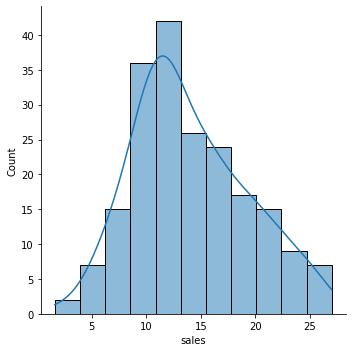

In [11]:
sns.displot(df_visualization_continous['sales'],kde=True)

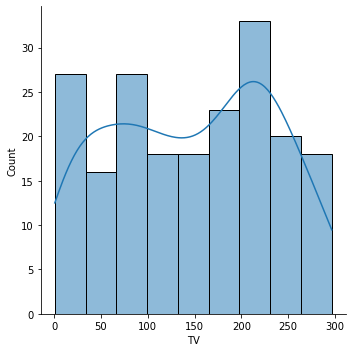

In [12]:
sns.displot(df_visualization_continous['TV'],kde=True)

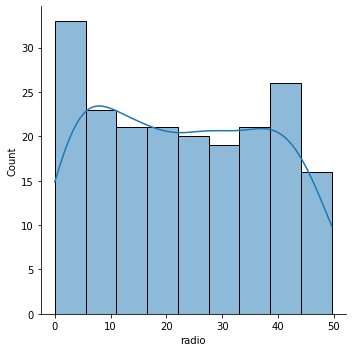

In [13]:
sns.displot(df_visualization_continous['radio'],kde=True)

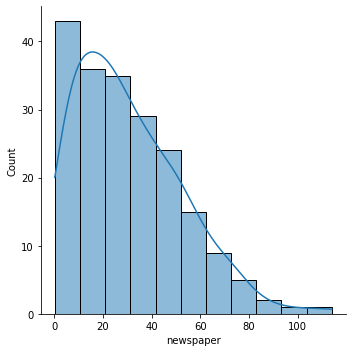

In [14]:
sns.displot(df_visualization_continous['newspaper'],kde=True)

<AxesSubplot:>

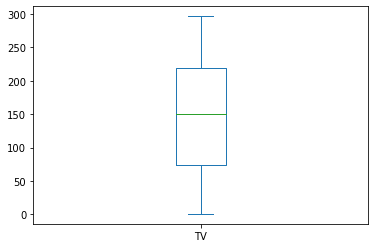

In [15]:
df['TV'].plot.box()

<AxesSubplot:>

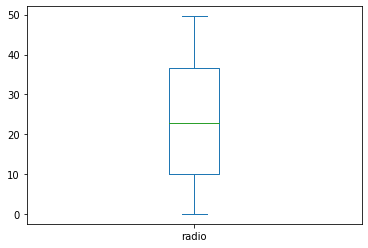

In [16]:
df['radio'].plot.box()

<AxesSubplot:>

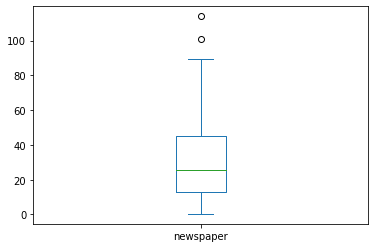

In [17]:
df['newspaper'].plot.box()

<AxesSubplot:>

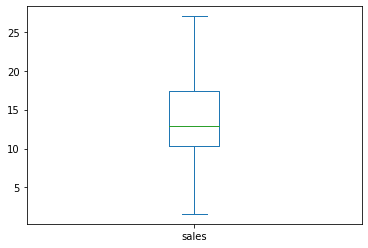

In [18]:
df['sales'].plot.box()

in the newspaper column some outlayers are present

In [19]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


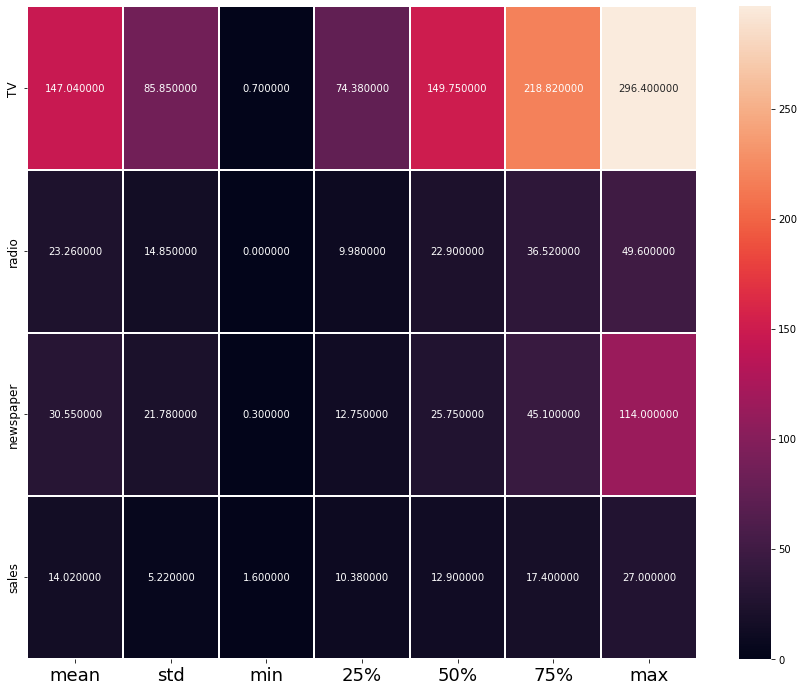

In [20]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12) 
plt.show()

observation:
TV
mean:147.04
median:149.75
std:85
min:0.70
max:296.40
    
radio
mean:23.6
std:14
median:22.90
min:0
max:49
    
newspaper
mean:30.55
std:21
median:25.75
min:0.30
max:114

sales
mean:14
std:5
median:12.9
min:1.60
max:27

Tv,radio,Newspaper and sales everywhere mean is greater than median that means skewness is present.......and standard deviation is not so high that means data is not highly spreaded

# CORRELATION

In [21]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


TV has a positive relation ....raidio and newspapers are nagetively correlated

In [22]:
df.corr()["sales"].sort_values()

newspaper    0.228299
radio        0.576223
TV           0.782224
sales        1.000000
Name: sales, dtype: float64

# outlayer checking:

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


array([<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
      dtype=object)

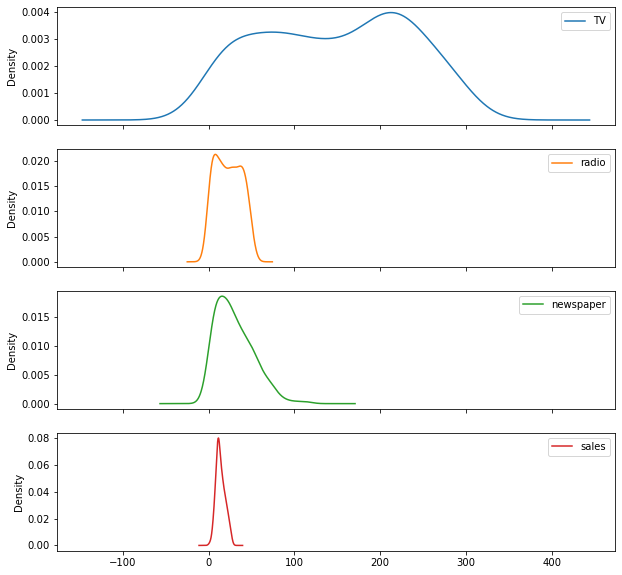

In [24]:
df.plot(kind='kde',subplots=True,figsize=(10,10))

# Considering the outlier removal

In [25]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(200, 4)

In [26]:
threshold=3 #rule of thumb
print(np.where(z>3))

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))


In [27]:
len(np.where(z>3)[0])

2

In [28]:
z.iloc[16]

TV           0.925305
radio        0.900494
newspaper    3.841171
sales        0.292541
Name: 16, dtype: float64

In [29]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [30]:
df_new_z.shape

(198, 4)

In [31]:
df.shape

(200, 4)

# data loss

In [32]:
(200-198)/200*100

1.0

1% data are removed...where outlier is present

In [33]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

In [34]:
x=df_new_z.iloc[:,:-1]
#target
y=df_new_z.iloc[:,-1]

In [35]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.95598306,  0.9691098 ,  1.6041965 ],
       [-1.19200349,  1.04623436,  0.83104401],
       [-1.6461253 ,  1.37296802,  1.60705249],
       [ 0.14293428,  1.1473316 ,  1.28376774],
       [ 0.45645241, -0.73502642,  1.28062154],
       [-1.8204008 ,  1.51543955,  1.76610727],
       [-1.00349358,  0.70309642, -0.10205346],
       [-0.20996049, -0.0876566 , -0.84968895],
       [-1.82264543, -1.62948287, -2.09866461],
       [ 0.652694  , -1.56152179, -0.22649933],
       [-0.88482761, -1.19258569, -0.06553382],
       [ 0.80322028,  0.19357553, -1.59608414],
       [-1.52567125,  0.82725998,  1.50859232],
       [-0.48090308, -1.01613619, -1.23269654],
       [ 0.69642374,  0.70856268,  0.86367455],
       [ 0.60769456,  1.45886692,  1.1026083 ],
       [ 1.44702338,  1.06152278,  1.19771741],
       [-0.84304109, -0.02834315, -0.39458775],
       [ 0.09676151,  0.18741189, -0.346834  ],
       [ 0.84017479,  0.41523303,  1.11921444],
       [ 1.02746612, -1.2660875 , -0.102

In [36]:
x.skew()

AttributeError: 'numpy.ndarray' object has no attribute 'skew'

# Separating the columns into feature and target

In [37]:
features=df.drop("sales",axis=1)
target=df["sales"]

# Sacling the data using MIN MAX Scaler:

In [38]:
from sklearn.preprocessing import MinMaxScaler
mns=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [39]:
import warnings
warnings.filterwarnings('ignore')

In [40]:
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=i)
    lr.fit(features_train,target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    print(f"At random state{i},the training accuracy is :- {r2_score(target_train,pred_train)}")
    print(f"At random state{i},the training accuracy is :- {r2_score(target_test,pred_test)}")
    print("\n")    
    

At random state0,the training accuracy is :- 0.9067114990146383
At random state0,the training accuracy is :- 0.8601145185017868


At random state1,the training accuracy is :- 0.8959372632325174
At random state1,the training accuracy is :- 0.8927605914615383


At random state2,the training accuracy is :- 0.9151707412454462
At random state2,the training accuracy is :- 0.7575894500772719


At random state3,the training accuracy is :- 0.8930288385772915
At random state3,the training accuracy is :- 0.9138375011080567


At random state4,the training accuracy is :- 0.8911672911176578
At random state4,the training accuracy is :- 0.9085774752313167


At random state5,the training accuracy is :- 0.8956962280033928
At random state5,the training accuracy is :- 0.8984204533332628


At random state6,the training accuracy is :- 0.8915418760966582
At random state6,the training accuracy is :- 0.9224333473922028


At random state7,the training accuracy is :- 0.8929164670647455
At random state7,the train

At random state96,the training accuracy is :- 0.9035998291188063
At random state96,the training accuracy is :- 0.8595641556662492


At random state97,the training accuracy is :- 0.8900751965631104
At random state97,the training accuracy is :- 0.9118128867084085


At random state98,the training accuracy is :- 0.8819661469883454
At random state98,the training accuracy is :- 0.9400331814664701


At random state99,the training accuracy is :- 0.8906288862925659
At random state99,the training accuracy is :- 0.9200846680148507




In [41]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=12)

In [42]:
lr.fit(features_train,target_train)

LinearRegression()

In [43]:
pred_test=lr.predict(features_test)

In [44]:
print(r2_score(target_test,pred_test))

0.9125583321991083


# Cross valiidation of the model

In [45]:
Train_accuracy=r2_score(target_train,pred_train)
Test_accuracy=r2_score(target_test,pred_test)
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,features,target,cv=j)
    cv_mean=cv_score.mean()
    print(f"at cross fold{j} the cross score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score for testing{Test_accuracy}")
    print("\n")

at cross fold2 the cross score is 0.8908473589845056 and accuracy score for training is -1.0998635836807025 and accuracy score for testing0.9125583321991083


at cross fold3 the cross score is 0.8916464591145559 and accuracy score for training is -1.0998635836807025 and accuracy score for testing0.9125583321991083


at cross fold4 the cross score is 0.8900070660549507 and accuracy score for training is -1.0998635836807025 and accuracy score for testing0.9125583321991083


at cross fold5 the cross score is 0.8871063495438436 and accuracy score for training is -1.0998635836807025 and accuracy score for testing0.9125583321991083


at cross fold6 the cross score is 0.8899208882186672 and accuracy score for training is -1.0998635836807025 and accuracy score for testing0.9125583321991083


at cross fold7 the cross score is 0.8859930219823539 and accuracy score for training is -1.0998635836807025 and accuracy score for testing0.9125583321991083


at cross fold8 the cross score is 0.8826686689

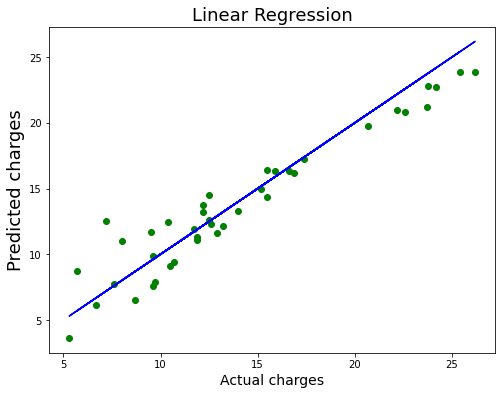

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=target_test,y=pred_test,color='g')
plt.plot(target_test,target_test,color='b')
plt.xlabel('Actual charges',fontsize=14)
plt.ylabel('Predicted charges',fontsize=18)
plt.title('Linear Regression',fontsize=18)
plt.show()

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [48]:
from sklearn.linear_model import Lasso
parameters={'alpha':[0.0001,0.001,0.01,0.1,10],'random_state':list(range(0,10))}

In [49]:
ls=Lasso()
clif=GridSearchCV(ls,parameters)
clif.fit(features_train,target_train)
print(clif.best_params_)

{'alpha': 0.01, 'random_state': 0}


In [50]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(features_train,target_train)
ls.score(features_train,target_train)
pred_ls=ls.predict(features_test)
lss=r2_score(target_test,pred_ls)
lss

0.9144822338212197

In [51]:
cv_score=cross_val_score(ls,features,target,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.8882007416256036

# Esamble technique

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
estimator = RandomForestRegressor()
parameters={'n_estimators': [200,300,400,500],
    'max_features': ['sqrt','log2'],
    'max_depth' : [3,4,5,6,7],
    'random_state' : [18]}
rf=RandomForestRegressor
clf=GridSearchCV(estimator, parameters, n_jobs=-1, cv=5)
clf.fit(features_train,target_train)
print(clf.best_params_)

{'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 500, 'random_state': 18}


In [54]:
rf=RandomForestRegressor(criterion="mse",max_features="auto")
rf.fit(features_train,target_train)
rf.score(features_train,target_train)
pred_decision=rf.predict(features_test)
rfs=r2_score(target_test,pred_decision)
print("R2 score:",rfs*100)
rfscore=cross_val_score(rf,features,target,cv=5)
rfc=rfscore.mean()
print("Cross_val_score:",rfc*100)

R2 score: 98.54780004211636
Cross_val_score: 97.49783195309662


# We are getting accuracy and cross validation both as 98% which shows model performing very well

In [57]:
import pickle
filename='salesss.pkl'
pickle.dump(rf,open(filename,'wb'))

# Conclusion:

In [59]:
loaded_model=pickle.load(open('salesss.pkl','rb'))
results=loaded_model.score(features_test,target_test)

In [60]:
results

0.9854780004211636

In [61]:
conclusion=pd.DataFrame([loaded_model.predict(features_test)[:],pred_decision[:]],index=['Predicted','Orginal'])

In [62]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
Predicted,15.286,8.79,6.942,12.088,12.752,16.85,24.967,9.831,12.582,13.1,...,11.243,25.139,16.352,21.322,6.581,20.838,13.245,22.458,11.354,7.271
Orginal,15.286,8.79,6.942,12.088,12.752,16.85,24.967,9.831,12.582,13.1,...,11.243,25.139,16.352,21.322,6.581,20.838,13.245,22.458,11.354,7.271
